In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Prob of missing for a single trajectory in a single row

In [203]:
num_days = 100000
ship_len_bound = 4
lam = np.log(1 / 0.95) / ship_len_bound

In [219]:
iterations = 10000
minis = 0
misses = 0
for i in range(iterations):
    samples = np.zeros((num_days))
    ship_len = np.random.exponential(1 / lam)
    begin_loc = np.random.uniform(0, 4)
    if ship_len < ship_len_bound:
        if begin_loc < ship_len_bound - ship_len:
            misses += 1

In [220]:
misses/iterations

0.0276

# Prob of missing over whole board

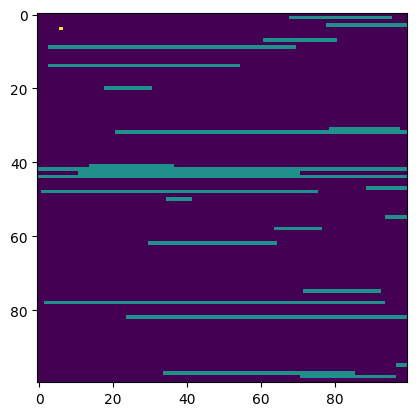

In [79]:
num_people = 100
num_days = 100
cumul_inc = 0.2
ship_len_bound = 4
lam = np.log(1 / 0.95) / ship_len_bound
samples = np.zeros((num_people, num_days))

is_infx = np.random.binomial(1, cumul_inc, size = num_people)
num_infections = sum(is_infx)
misses = 0
for row in range(len(is_infx)):
    if is_infx[row] == 1:
        ship_len = np.random.exponential(1 / lam)
        begin_loc = np.random.uniform(0, num_days - ship_len - 1)
        samples[row, int(begin_loc) : int(begin_loc + ship_len)] = 1
        if ship_len < ship_len_bound:
            if begin_loc % ship_len_bound < ship_len_bound - ship_len:
                misses += 1
                samples[row, int(begin_loc) : int(begin_loc + ship_len)] = 2
plt.imshow(samples)  

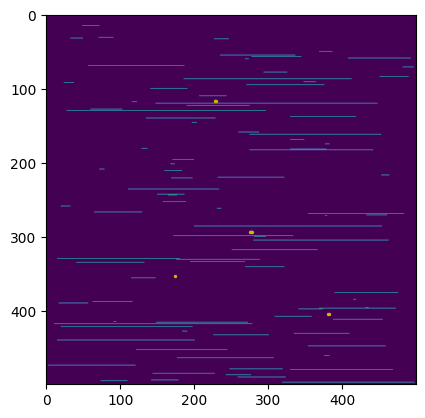

In [76]:
num_people = 500
num_days = 500
cumul_inc = 0.2
ship_len_bound = 4
lam = np.log(1 / 0.95) / ship_len_bound
samples = np.zeros((num_people, num_days))

is_infx = np.random.binomial(1, cumul_inc, size = num_people)
num_infections = sum(is_infx)
misses = 0
for row in range(len(is_infx)):
    if is_infx[row] == 1:
        ship_len = np.random.exponential(1 / lam)
        begin_loc = np.random.uniform(0, num_days - ship_len - 1)
        samples[row, int(begin_loc) : int(begin_loc + ship_len)] = 1
        if ship_len < ship_len_bound:
            if begin_loc % ship_len_bound < ship_len_bound - ship_len:
                misses += 1
                samples[row, int(begin_loc) : int(begin_loc + ship_len)] = 2
plt.imshow(samples)  
missed_indices = []
for row in range(len(samples)):
    for col in range(len(samples[0])):
        if samples[row, col] == 2:
            missed_indices.append([row, col])
missed_indices = np.array(missed_indices)
plt.imshow(samples)
plt.scatter(missed_indices[:,1], missed_indices[:,0], color = 'y', s = 2)